In [11]:
ls

drive/  feature_data.pkl  sample_data/  test.jpg


In [12]:
import os
os.chdir('/content/drive/MyDrive/Fashion Product System')

In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imd
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.layers import Flatten,GlobalMaxPool2D
from numpy.linalg import norm
import os
from tqdm import tqdm

In [4]:
model = ResNet50(include_top=False,input_shape=(224,224,3))
model.trainable = False
model = tf.keras.Sequential([
    model,
    GlobalMaxPool2D()
])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
def extract_feature(file,model):
    img = load_img(file,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    process_img = preprocess_input(img)
    result = model.predict(process_img)
    result = result / norm(result)
    return result

In [13]:
url = 'https://1ststep.pk/cdn/shop/files/6_ad59d255-a4ec-4b7e-bde5-f3abab93952a_2048x.jpg?v=1704113247'
import requests
req = requests.get(url)
with open('test.jpg', 'wb') as handler:
    handler.write(req.content)

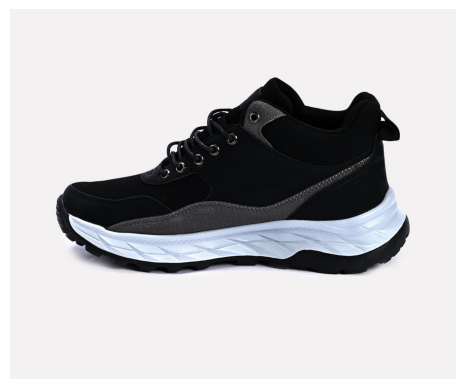

In [14]:
plt.imshow(imd.imread('test.jpg'))
plt.axis('off')
plt.show()
plt.show()

In [74]:
image_feature = extract_feature('test.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [79]:
url = 'https://www.kaggleusercontent.com/kf/198172739/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..xvj9R28cZllA8vd3adiXSQ.PU9_cIVQugjvpIIATivn_uOowNN71MAndZB2V9a0Or7PE7_z0OxEQpszG3y1MErNzi6tz4GcX2YcwBbuSr60f9h36juPS1Wi_5OEf9qKH1i7D23i60KbLHcFWQs5FKuFk43vwtuYo5okEd55BsBVMihBj5odlqECt3K7iiKjoGI7GvIswqUTDfoBnF1eLLNNF_B0JFTtmmdnb7OWR7CXqVMzcWA7Vocmx5LMmN8IHWxfD2JFG3H9sx131AhSPKmvBqRBs9e0Iye3uFAed-zRGiOaKLZYi-qR5mzyGW_cuvoDiF8QzO1dX8JaHc3rO9VhyfKsh8_CqKPkRK9YZVGyeueUJV0vOzbPrUJDMpxjBX1jlMsCqY3dkOGpKzXhdQQgHENvidl0Dq_ShcWZAm-1QWGfuMtoruneEbQmBkHB7NuZvGTcFGICWtUx0aS8OV9SWosIgfdKjqYIH7yj-ihaupcWmiGQlpRFrB68hg4iyhgyWstlmUXd5BdR9IwiUvukCNrI_zK7B9Tr-Syjw1DLLrtATdMToMqsj9gj4jvyHhgjjTkneLwN5idYyKejtIRe4TUyAfl_0Ngfbh9OsR4xdYYfjgC2CyIKdAFlC8Dr1l3BO-DB2nHB8cENHWoL-2mzKJRPLUhLPH1cHyRLLBvxHw.vW62_DXV1QM4RaiIKH-LWg/file_names.pkl'
import requests
req = requests.get(url)
with open('file_name.pkl', 'wb') as handler:
    handler.write(req.content)

In [80]:
feature_list = np.array(pickle.load(open('feature_data.pkl','rb')))
filenames = pickle.load(open('file_name.pkl','rb'))

In [70]:
feature_list = feature_list.reshape(feature_list.shape[0], -1)

In [73]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [65]:
image_feature = np.array(image_feature)
# image_feature

In [76]:
distances,indices = neighbors.kneighbors(image_feature)

In [84]:
for i in range(5):
  print(filenames[indices[0][i]])

34089.jpg
5692.jpg
30252.jpg
24218.jpg
34090.jpg
